# Bike Share Analysis in Python
I learned a lot working on the bike share case study for my Google Data Analytics certificate. I got to apply the skills I learned from the course and experienced first hand how data can impact decisions. Working on the project allowed me to develop a strong foundation with R including how to wrangle, clean, and visualize data. 
I know that Python is another programming language used to analyze data and I want to redo the same project to demonstrate my ability with Python as well as to have a better understanding of the differences between R and Python. 

## Background
A little background on the scenario and data:

Cyclistic is a bike-share company in Chicago with a fleet of 5,824 geotracked bicycles and a network of 692 stations. They offer 3 pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders and customers who purchase annual memberships are referred to as Cyclistic members. The company determined that annual members are more profitable than casual riders and is aiming to create a marketing campaign to maximize the number of annual members by converting casual riders.

**Key stakeholder**: Lily Moreno, the director of marketing responsible for developing campaigns to promote bike-share program.

**Business task**: How do annual members and casual riders use Cyclistic bikes differently?

***

I used proxy data from a similar bike sharing company called Divvy which can be downloaded here: <a href="https://divvy-tripdata.s3.amazonaws.com/index.html" target="_blank">https://divvy-tripdata.s3.amazonaws.com/index.html</a>
I downloaded 12 months of data and merged 12 CSV files into a dataframe.

In [1]:
# Setup envionment and import libraries
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np
import glob
from pandas.api.types import CategoricalDtype

# Full output for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Read and merge CSV files to dataframe
df = pd.concat(map(pd.read_csv, glob.glob("data/*.csv")))

I wanted to view the data to confirm the merge was successful and to review the column names and data types. 

In [3]:
# Preview data
df
df.info()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,3564070EEFD12711,electric_bike,2022-04-06 17:42:48,2022-04-06 17:54:36,Paulina St & Howard St,515,University Library (NU),605,42.019135,-87.673532,42.052939,-87.673447,member
1,0B820C7FCF22F489,classic_bike,2022-04-24 19:23:07,2022-04-24 19:43:17,Wentworth Ave & Cermak Rd,13075,Green St & Madison St,TA1307000120,41.853085,-87.631931,41.881892,-87.648789,member
2,89EEEE32293F07FF,classic_bike,2022-04-20 19:29:08,2022-04-20 19:35:16,Halsted St & Polk St,TA1307000121,Green St & Madison St,TA1307000120,41.871840,-87.646640,41.881892,-87.648789,member
3,84D4751AEB31888D,classic_bike,2022-04-22 21:14:06,2022-04-22 21:23:29,Wentworth Ave & Cermak Rd,13075,Delano Ct & Roosevelt Rd,KA1706005007,41.853085,-87.631931,41.867491,-87.632190,casual
4,5664BCF0D1DE7A8B,electric_bike,2022-04-16 15:56:30,2022-04-16 16:02:11,Halsted St & Polk St,TA1307000121,Clinton St & Madison St,TA1305000032,41.871808,-87.646574,41.882242,-87.641066,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
634853,8891BA0053ECEC4F,electric_bike,2022-05-27 22:00:02,2022-05-27 22:07:01,Clark St & Newport St,632,NaN,NaN,41.944557,-87.654830,41.920000,-87.650000,member
634854,47D8B5FBCADECFC1,electric_bike,2022-05-15 16:05:39,2022-05-15 16:44:12,Clark St & Newport St,632,NaN,NaN,41.944479,-87.654758,41.920000,-87.760000,member
634855,AA8D16CF38B40703,electric_bike,2022-05-21 10:10:13,2022-05-21 10:26:09,Francisco Ave & Bloomingdale Ave,429,NaN,NaN,41.910000,-87.700000,41.920000,-87.660000,casual
634856,897EBFD44F329E0A,electric_bike,2022-05-12 07:53:58,2022-05-12 08:01:18,Francisco Ave & Bloomingdale Ave,429,NaN,NaN,41.910000,-87.700000,41.900000,-87.690000,member


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006107 entries, 0 to 634857
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1006107 non-null  object 
 1   rideable_type       1006107 non-null  object 
 2   started_at          1006107 non-null  object 
 3   ended_at            1006107 non-null  object 
 4   start_station_name  848516 non-null   object 
 5   start_station_id    848516 non-null   object 
 6   end_station_name    837648 non-null   object 
 7   end_station_id      837648 non-null   object 
 8   start_lat           1006107 non-null  float64
 9   start_lng           1006107 non-null  float64
 10  end_lat             1005068 non-null  float64
 11  end_lng             1005068 non-null  float64
 12  member_casual       1006107 non-null  object 
dtypes: float64(4), object(9)
memory usage: 107.5+ MB


In [4]:
# Convert started_at and ended_at columns to DateTime format
df['started_at'] = pd.to_datetime(df['started_at'], format = '%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'], format = '%Y-%m-%d %H:%M:%S')

# Add columns for year, month, day, and day of the week 
df['year'] = df['started_at'].dt.year
df['month'] = df['started_at'].dt.month
df['day'] = df['started_at'].dt.day
df['day_of_week'] = df['started_at'].dt.day_name()

# Order days of the week
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cat_type = CategoricalDtype(categories = cats, ordered = True)
df['day_of_week'] = df['day_of_week'].astype(cat_type)


In [11]:
# Add column for ride length
df['ride_length'] = df['ended_at'] - df['started_at']
# Convert DateTime format to seconds
df['ride_length'] = df['ride_length'].dt.total_seconds()

In [13]:
# Check for duplicate rows
df_dupes = df[df.duplicated(['ride_id'])]
print(df_dupes)
# Check for inconsistent data (i.e. more than 2 member types)
df['member_casual'].value_counts()
df['rideable_type'].value_counts()
# Check data is within date range
df['started_at'].max()
df['started_at'].min()
# Check for negative ride durations
negative_ride_length = df[(df['ride_length'] < 0)]
print(negative_ride_length)

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, year, month, day, day_of_week, ride_length]
Index: []


member    599275
casual    406832
Name: member_casual, dtype: int64

classic_bike     490758
electric_bike    476824
docked_bike       38525
Name: rideable_type, dtype: int64

Timestamp('2022-05-31 23:59:56')

Timestamp('2022-04-01 00:01:48')

                 ride_id  rideable_type          started_at  \
592385  0793C9208A64302A  electric_bike 2022-05-30 11:06:29   

                  ended_at       start_station_name start_station_id  \
592385 2022-05-30 11:06:17  Broadway & Waveland Ave            13325   

       end_station_name end_station_id  start_lat  start_lng  end_lat  \
592385              NaN            NaN  41.949069 -87.648499    41.95   

        end_lng member_casual  year  month  day day_of_week  ride_length  
592385   -87.65        casual  2022      5   30      Monday        -12.0  


In [ ]:
# Check for inconsistent data (i.e. more than 2 member types)
df['member_casual'].value_counts()
df['rideable_type'].value_counts()
# Check data is within date range
df['started_at'].max()
df['started_at'].min()
# Check for negative ride durations
negative_ride_length = df[(df['ride_length'].dt.total_seconds() < 0)]
print(negative_ride_length)

In [ ]:
# Remove irrelevant columns and missing rows
df.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis = 1, inplace = True)
df.dropna(subset = ['start_station_name', 'end_station_name'])

# Drop rows with docked_bike or negative ride length
df = df[(df['rideable_type'] != 'docked_bike') & (df['ride_length'].dt.total_seconds() > 0)]=

In [21]:
df['ride_length'].describe()

count    967503.000000
mean       1022.326001
std        2770.669564
min           1.000000
25%         347.000000
50%         623.000000
75%        1133.000000
max       90032.000000
Name: ride_length, dtype: float64

In [22]:
# Group by day of week and member type, then aggregate average ride length
df1 = df.groupby(['day_of_week', 'member_casual'])['ride_length'].mean()
print(df1)

day_of_week  member_casual
Sunday       casual           1600.730226
             member            826.490569
Monday       casual           1488.818870
             member            748.737829
Tuesday      casual           1300.343166
             member            719.519321
Wednesday    casual           1209.867370
             member            694.564649
Thursday     casual           1340.308293
             member            744.347767
Friday       casual           1312.516846
             member            718.146433
Saturday     casual           1649.272563
             member            851.650341
Name: ride_length, dtype: float64


In [ ]:
#Plot average ride length vs Month
plt.figure(figsize=[15, 14])
sns.barplot(data = df, x = 'day_of_week', y = 'ride_length', hue = 'member_casual')
plt.title('Average Ride Length vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length (seconds)')

<Figure size 1080x1008 with 0 Axes>

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

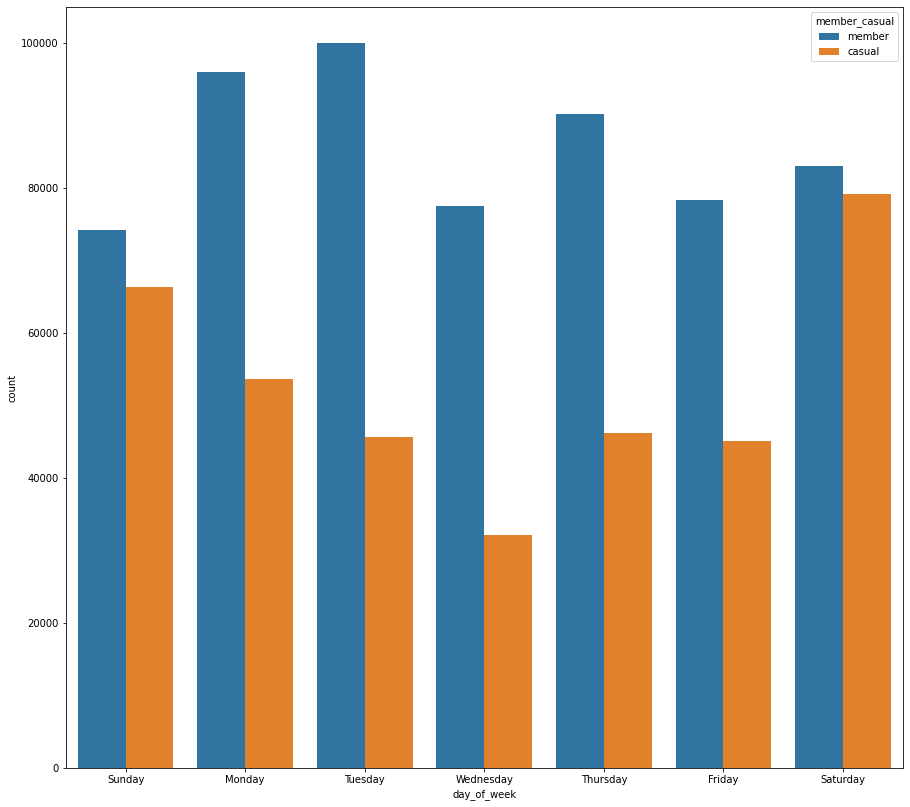

In [24]:
#Plot number of rides vs. day of the week
plt.figure(figsize=[15, 14])
sns.countplot(data = df, x = 'day_of_week', hue = 'member_casual')
plt.title('Number of Rides vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')